Kelompok 2
> Syahril Arfian Almazril - 103032300013

> Nauval Yusriya Athalla  - 103032330022

> Muhammad Arief Ridwansyah - 103032300064











Dataset yang digunakan dalam Tugas Besar SISTEM CERDAS ini adalah Milk Quality Dataset yang diperoleh dari Kaggle dengan sumber: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality





Latar Belakang

Industri susu merupakan salah satu sektor penting dalam industri pangan yang memerlukan kontrol kualitas yang ketat untuk memastikan keamanan dan kualitas produk. Penilaian kualitas susu secara tradisional dilakukan melalui pengujian laboratorium yang memakan waktu dan biaya tinggi. Oleh karena itu, pengembangan sistem otomatis untuk klasifikasi kualitas susu menggunakan machine learning menjadi solusi yang menarik untuk meningkatkan efisiensi proses quality control.
Penelitian ini bertujuan untuk mengembangkan model machine learning yang dapat mengklasifikasikan kualitas susu berdasarkan parameter-parameter fisikokimia seperti pH, suhu, rasa, aroma, kandungan lemak, kekeruhan, dan warna. Dengan memanfaatkan teknik pembelajaran mesin, diharapkan dapat dibangun sistem yang akurat, efisien, dan dapat diandalkan untuk mendukung proses penjaminan kualitas susu.

Target Utama:

- Bagaimana mengembangkan model machine learning yang dapat mengklasifikasikan kualitas susu secara akurat
- Metode machine learning mana yang memberikan performa terbaik untuk klasifikasi kualitas susu?
- Bagaimana menangani ketidakseimbangan data dalam dataset kualitas susu?
- Fitur apa saja yang paling berpengaruh terhadap klasifikasi kualitas susu?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel

Kode untuk data = pd.read_csv('milknew.csv') digunakan untuk membaca file milknew.csv dan menyimpannya dalam bentuk DataFrame. Sementara itu, data.head() akan menampilkan lima baris pertama dari data untuk memberikan semacam gambaran awal tentang struktur dan isi dataset.

In [ ]:
data = pd.read_csv('milknew.csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


Kode data.shape digunakan untuk melihat ukuran dataset, yaitu jumlah baris dan kolom, yang membantu kita memahami seberapa besar dataset sebelum melakukan analisis lebih lanjut.

In [ ]:
data.shape

(1059, 8)

Perintah **`data.info()`** memberikan gambaran tentang dataset, termasuk **jumlah baris**, **kolom**, dan **tipe data**, untuk memeriksa data hilang. Sedangkan **`data.describe()`** menampilkan **statistik dasar** kolom numerik untuk memahami distribusi dan mendeteksi **outlier**. Keduanya penting dalam **eksplorasi data awal**.


In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


Kode **`data.isnull().sum()`** digunakan untuk mengecek jumlah **nilai kosong** (missing values) pada setiap kolom. Fungsi **`isnull()`** menghasilkan DataFrame dengan nilai **True** untuk sel kosong dan **False** untuk yang tidak, lalu **`sum()`** menghitung jumlah **True** tersebut per kolom. Hasil ini sangat penting dalam **pembersihan data** untuk menentukan strategi penanganan **missing values**, seperti menghapus atau mengimputasi data.


In [ ]:
data.isnull().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


Kode ini digunakan untuk menampilkan **distribusi variabel target** ('Grade') yang merepresentasikan kualitas susu (**high**, **medium**, **low**).

Pertama, **`data['Grade'].value_counts()`** menghitung jumlah kemunculan masing-masing kategori grade.

Selanjutnya, **`len(data)`** digunakan untuk menghitung jumlah total data, yang digunakan sebagai pembagi untuk menghitung **persentase** masing-masing kategori grade terhadap total data.

Terakhir, menampilkan persentase susu dengan grade **high**, **medium**, dan **low**, yang dihitung dengan rumus:

(**jumlah grade tertentu / jumlah total data**) × 100%

In [ ]:
print("\nDistribusi Target Variable (Grade):")
grade_distribution = data['Grade'].value_counts()
print(grade_distribution)
print(f"Jumlah data Keseluruhan: {len(data)}")

print(f"Persentase susu dengan grade high: {grade_distribution['high']/len(data)*100:.2f}%")
print(f"Persentase susu dengan grade medium: {grade_distribution['medium']/len(data)*100:.2f}%")
print(f"Persentase susu dengan grade low: {grade_distribution['low']/len(data)*100:.2f}%")


Distribusi Target Variable (Grade):
Grade
low       429
medium    374
high      256
Name: count, dtype: int64
Jumlah data Keseluruhan: 1059
Persentase susu dengan grade high: 24.17%
Persentase susu dengan grade medium: 35.32%
Persentase susu dengan grade low: 40.51%


Kode ini digunakan untuk membuat **visualisasi distribusi** variabel kategori **Grade** yang merepresentasikan kualitas susu dalam dataset menggunakan **Matplotlib** dan **Seaborn**.

- **Pengaturan Ukuran Grafik**: **`plt.figure(figsize=(10, 6))`** mengatur ukuran grafik menjadi 10 inci lebar dan 6 inci tinggi untuk visualisasi yang lebih jelas.

- **Membuat Grafik Batang (Count Plot)**: **`sns.countplot(x='Grade', data=data, palette='viridis')`** membuat grafik batang untuk menunjukkan jumlah sampel tiap kategori **Grade**, dengan palet warna **viridis** agar tampilan lebih menarik.

- **Menambahkan Judul dan Label Sumbu**:
  - **`plt.title()`** memberikan judul grafik dengan ukuran font 16.
  - **`plt.xlabel()`** dan **`plt.ylabel()`** menambahkan label sumbu-x dan sumbu-y dengan ukuran font 14.

- **Menyimpan Gambar**: **`plt.savefig('distribusi_grade_kualitas.png')`** menyimpan grafik sebagai file gambar.

- **Menampilkan Grafik**: **`plt.show()`** menampilkan grafik secara interaktif.

<ipython-input-125-38e189a79b19>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Grade', data=data, palette='viridis')


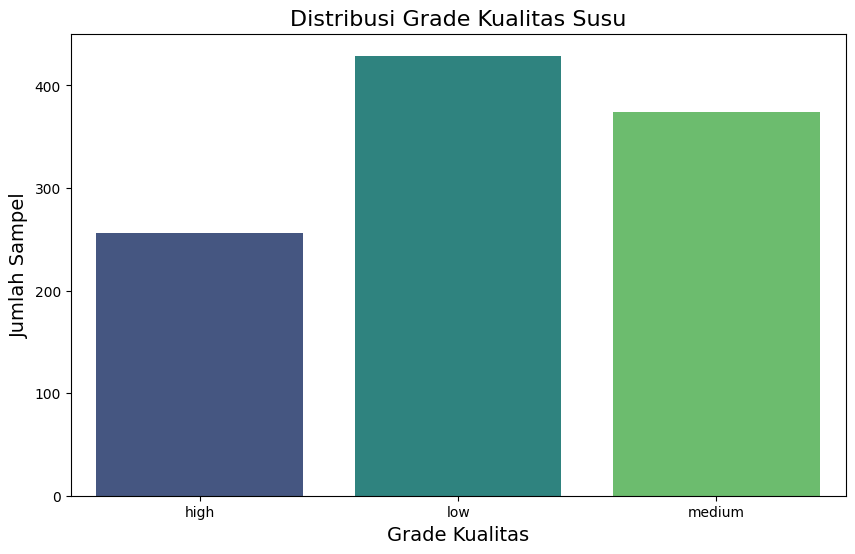

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Grade', data=data, palette='viridis')
plt.title('Distribusi Grade Kualitas Susu', fontsize=16)
plt.xlabel('Grade Kualitas', fontsize=14)
plt.ylabel('Jumlah Sampel', fontsize=14)
plt.savefig('distribusi_grade_kualitas.png')
plt.show()

Kode ini digunakan untuk membuat **tiga histogram distribusi variabel numerik** secara horizontal (1 baris, 3 kolom) dengan **Matplotlib** dan **Seaborn**.

- **Pengaturan Ukuran Grafik**: **`plt.figure(figsize=(16, 10))`** mengatur ukuran figur menjadi 16 inci lebar dan 10 inci tinggi agar ketiga grafik dapat tampil dengan jelas.

- **Iterasi dan Pembuatan Subplot**: **`for i, column in enumerate(numerical_features)`** digunakan untuk membuat tiga subplot yang menampilkan distribusi variabel numerik (**pH**, **Temperature**, dan **Colour**).

- **Histogram Berwarna Berdasarkan Kelas Grade**:
  - **`sns.histplot()`** digunakan untuk menggambarkan histogram dengan **hue='Grade'** untuk pewarnaan berdasarkan kelas target.
  - **`kde=False`** menonaktifkan kurva kepadatan.
  - **`palette='coolwarm'`** menentukan palet warna, dan **`bins=20`** mengatur jumlah interval histogram.
  - **`stat='count'`** memastikan sumbu-y menunjukkan jumlah sampel, serta **`alpha=0.6`** memberikan transparansi.

- **Judul dan Label Sumbu**: Setiap subplot memiliki judul dengan **ukuran font 16** dan **tebal (weight='bold')**, serta label sumbu dengan ukuran font **14**.

- **Penyesuaian Tata Letak**: **`plt.tight_layout()`** mengatur tata letak agar tidak saling bertumpuk.

- **Menyimpan Gambar dengan Resolusi Tinggi**: **`plt.savefig('distribusi_variabel_kontinu.png', dpi=300)`** menyimpan gambar dengan resolusi 300 dpi.

- **Menampilkan Grafik**: **`plt.show()`** menampilkan seluruh figur secara interaktif.

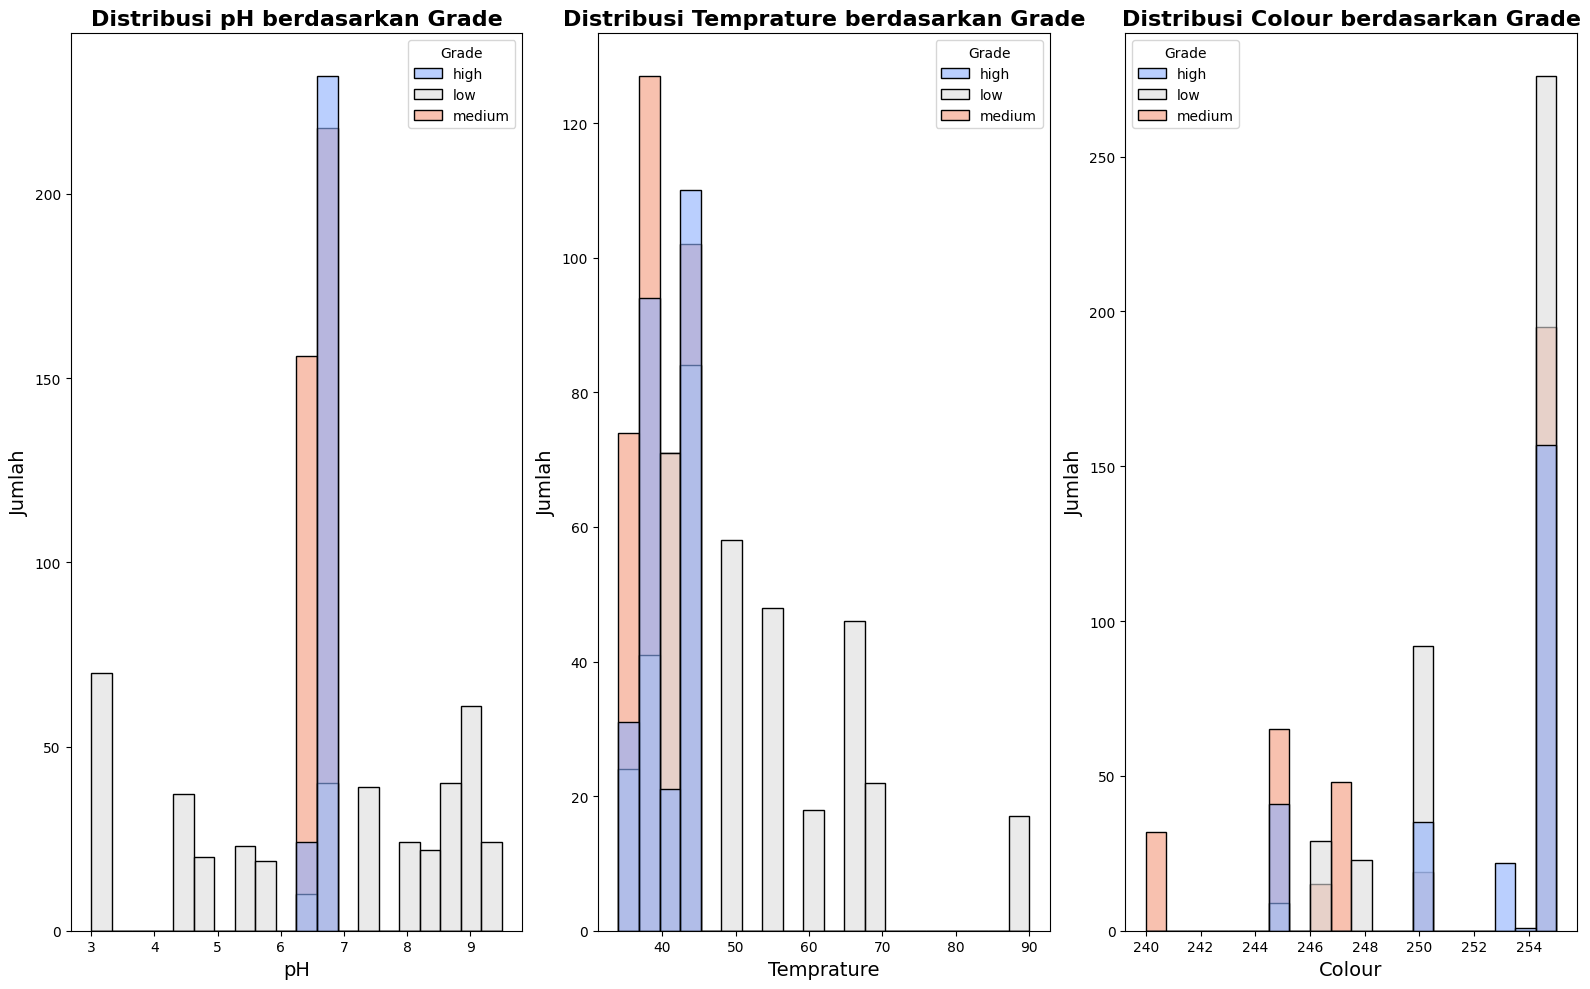

In [ ]:
plt.figure(figsize=(16, 10))
numerical_features = ['pH', 'Temprature', 'Colour']
for i, column in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=data, x=column, hue='Grade', kde=False, palette='coolwarm',
                 bins=20, stat='count', alpha=0.6)
    plt.title(f'Distribusi {column} berdasarkan Grade', fontsize=16, weight='bold')
    plt.xlabel(f'{column}', fontsize=14)
    plt.ylabel('Jumlah', fontsize=14)
plt.tight_layout()
plt.savefig('distribusi_variabel_kontinu.png', dpi=300)
plt.show()

Kode ini digunakan untuk membuat **empat grafik batang** distribusi variabel biner dalam **tata letak 2x2** menggunakan **Matplotlib** dan **Seaborn**.

- **Pengaturan Ukuran Grafik**: **`plt.figure(figsize=(16, 10))`** mengatur ukuran gambar menjadi 16 inci lebar dan 10 inci tinggi untuk menampung empat grafik batang dengan proporsi yang baik.

- **Iterasi dan Pembuatan Subplot**: Loop **`for i, column in enumerate(binary_vars)`** membuat empat subplot, masing-masing untuk satu variabel biner, dan **`plt.subplot(2, 2, i+1)`** menempatkan setiap subplot dalam grid 2x2.

- **Count Plot dengan Pewarnaan berdasarkan Grade**:
  - **`sns.countplot()`** menggambar grafik batang dengan **`x=column`** untuk variabel biner pada sumbu-x dan **`hue='Grade'`** untuk pewarnaan berdasarkan kategori Grade.
  - **`palette='viridis'`** memilih palet warna untuk tampilan yang lebih menarik.

- **Judul Subplot**: Setiap subplot diberi judul dengan **ukuran font 14** agar jelas tanpa mengganggu tata letak.

- **Penyesuaian Tata Letak**: **`plt.tight_layout()`** memastikan subplot tidak saling tumpang tindih.

- **Menyimpan Gambar**: **`plt.savefig('distribusi_variabel_biner.png')`** menyimpan gambar sebagai file.

- **Menampilkan Grafik**: **`plt.show()`** menampilkan visualisasi secara interaktif.


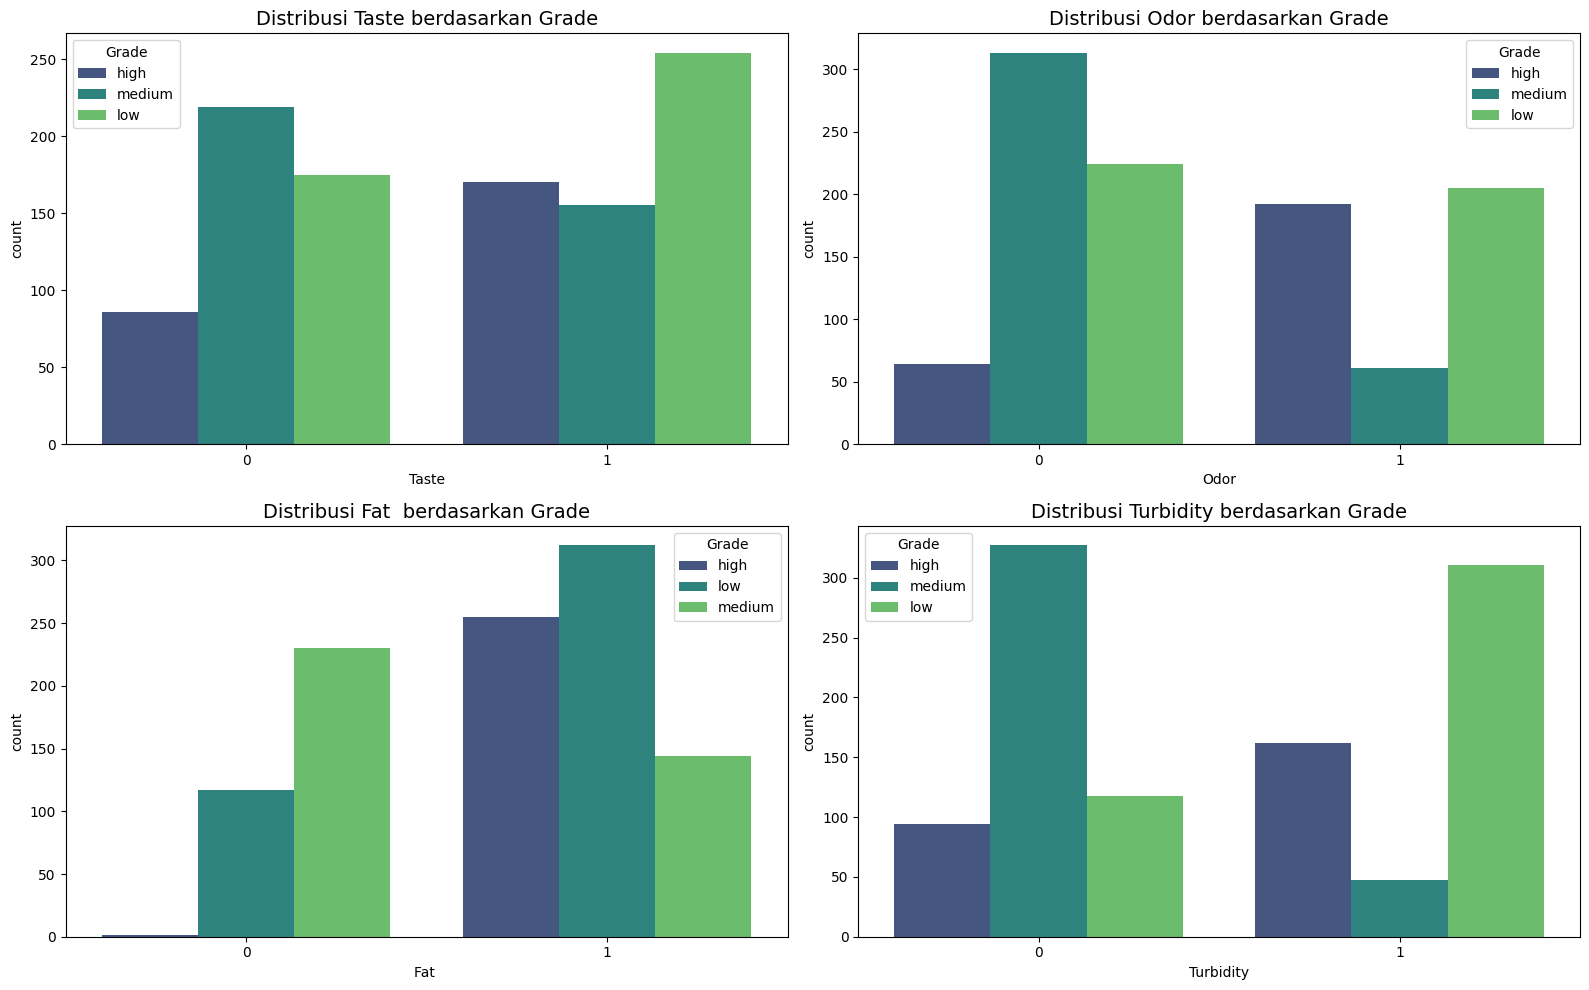

In [ ]:
plt.figure(figsize=(16, 10))
binary_vars = ['Taste', 'Odor', 'Fat ', 'Turbidity']
for i, column in enumerate(binary_vars):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=column, hue='Grade', data=data, palette='viridis')
    plt.title(f'Distribusi {column} berdasarkan Grade', fontsize=14)
plt.tight_layout()
plt.savefig('distribusi_variabel_biner.png')
plt.show()

Kode ini digunakan untuk **membersihkan nama kolom** dan membuat **boxplot** untuk fitur numerik dalam dataset.

- **Membersihkan Nama Kolom**: **`data.columns = data.columns.str.strip()`** menghilangkan **spasi kosong** di awal dan akhir nama kolom, mencegah kesalahan saat mengakses kolom.

- **Pengaturan Ukuran Grafik**: **`plt.figure(figsize=(10, 6))`** mengatur ukuran grafik menjadi 10 inci lebar dan 6 inci tinggi agar boxplot terlihat jelas.

- **Membuat Boxplot**: **`sns.boxplot(data=data[['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']])`** membuat boxplot untuk fitur numerik yang dipilih, menampilkan ringkasan statistik distribusi data dan mendeteksi **outlier**.

- **Memberikan Judul**: **`plt.title('Boxplot Fitur Kontinu')`** menambahkan judul untuk menjelaskan visualisasi.

- **Menampilkan Grafik**: **`plt.show()`** menampilkan boxplot secara interaktif.

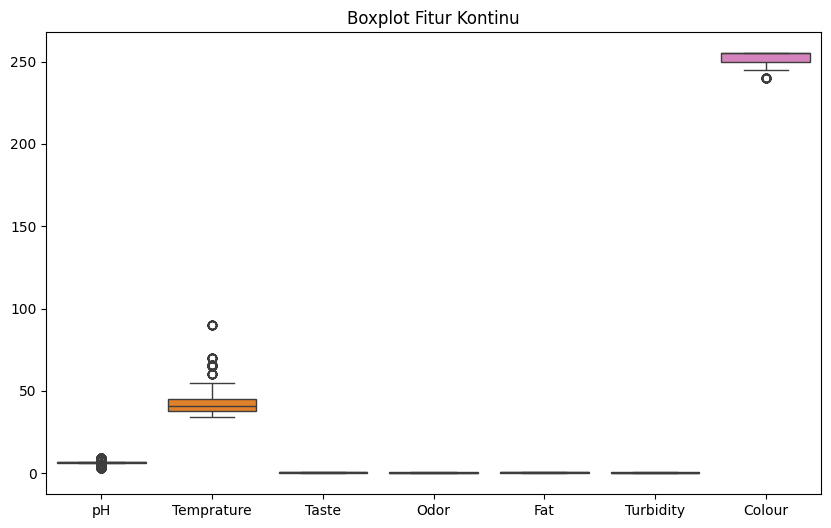

In [ ]:
data.columns = data.columns.str.strip()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']])
plt.title('Boxplot Fitur Kontinu')
plt.show()

Kode ini digunakan untuk **menganalisis dan memvisualisasikan korelasi** antar fitur numerik dalam dataset menggunakan **heatmap**.

- **Seleksi Fitur Numerik**: **`numeric_data = data.select_dtypes(include=[np.number])`** memilih semua kolom numerik dalam dataset untuk analisis korelasi.

- **Pengaturan Ukuran Grafik**: **`plt.figure(figsize=(12, 10))`** mengatur ukuran heatmap menjadi 12 inci lebar dan 10 inci tinggi agar label dan anotasi jelas.

- **Menghitung Matriks Korelasi**: **`correlation_matrix = numeric_data.corr()`** menghitung koefisien korelasi Pearson antar fitur numerik, menunjukkan hubungan linier antar pasangan fitur.

- **Membuat Heatmap Korelasi**: **`sns.heatmap()`** digunakan untuk memvisualisasikan matriks korelasi dengan opsi:
  - **`annot=True`** untuk menampilkan nilai korelasi di setiap sel.
  - **`cmap='coolwarm'`** memilih palet warna untuk menunjukkan korelasi positif dan negatif.
  - **`linewidths=0.5`** memberikan garis pembatas antar sel.

- **Judul dan Tata Letak**: **`plt.title()`** menambahkan judul dengan ukuran font 16, dan **`plt.tight_layout()`** memastikan tata letak rapi.

- **Menyimpan dan Menampilkan Gambar**: **`plt.savefig('matriks_korelasi.png')`** menyimpan heatmap sebagai gambar, dan **`plt.show()`** menampilkan heatmap secara interaktif.

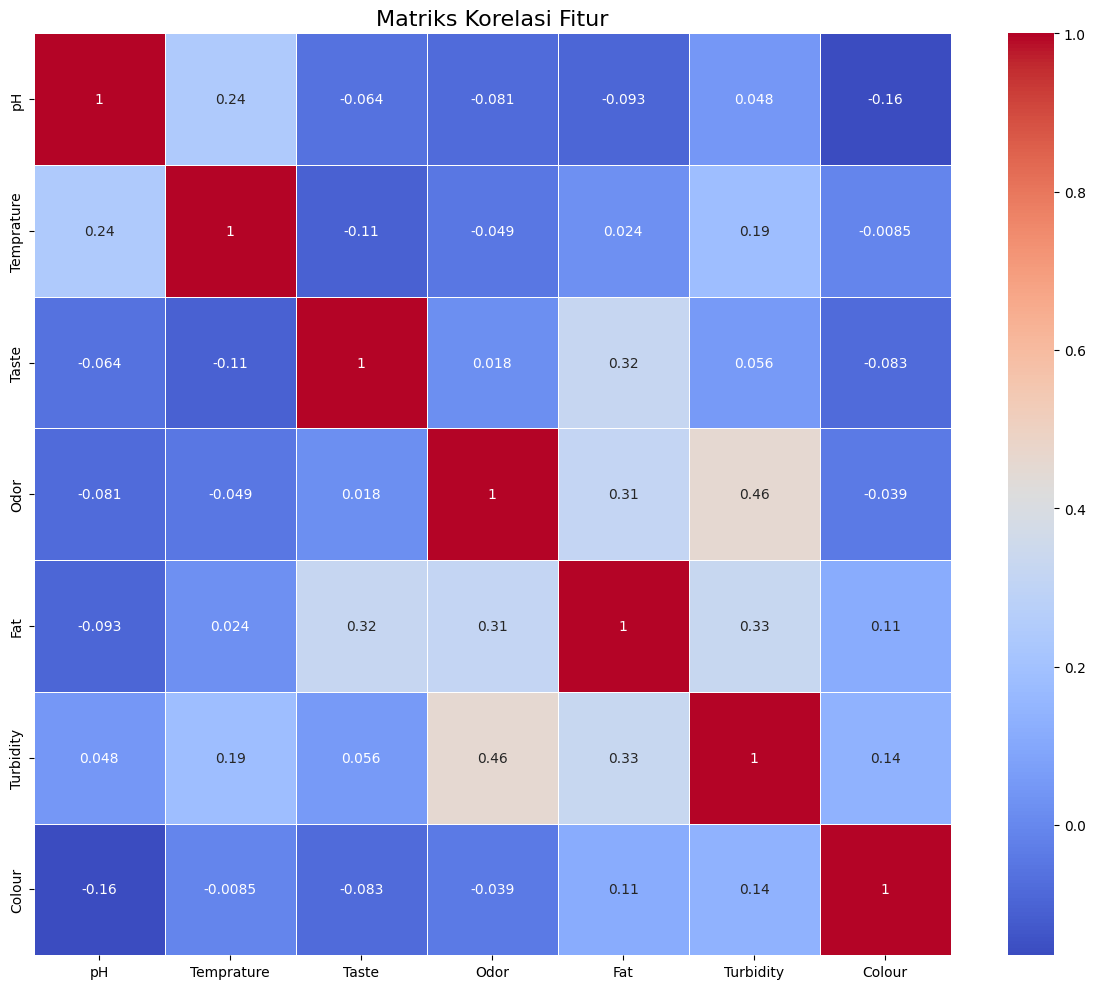

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Fitur', fontsize=16)
plt.tight_layout()
plt.savefig('matriks_korelasi.png')
plt.show()

Kode ini digunakan untuk menyiapkan **data fitur dan target** untuk proses pemodelan machine learning, termasuk **encoding label**, pemisahan fitur dan target, identifikasi kolom numerik, dan pembagian data menjadi data latih dan data uji.

- **Encoding Label Target**:
  - **`label_encoder = LabelEncoder()`** membuat objek **LabelEncoder** untuk mengubah variabel kategori **Grade** menjadi format numerik.
  - **`y = label_encoder.fit_transform(data['Grade'])`** menerapkan encoding pada kolom **Grade** dan menyimpannya dalam variabel **y**.

- **Memisahkan Fitur dan Target**: **`X = data.drop('Grade', axis=1)`** membuat dataset fitur **X** dengan menghapus kolom **Grade**.

- **Identifikasi Kolom Numerik**:
  - **`numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()`** memilih kolom numerik dari dataset fitur untuk proses pra-pemrosesan.

- **Menampilkan Kolom Numerik**: **`print("Kolom Numerikal:", numerical_cols)`** menampilkan daftar kolom numerik.

- **Pembagian Data Latih dan Uji**:
  - **`train_test_split()`** membagi dataset menjadi data latih (80%) dan data uji (20%) dengan parameter **`random_state=42`** untuk memastikan hasil yang dapat direproduksi dan **`stratify=y`** untuk menjaga keseimbangan kelas target.

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Grade'])
X = data.drop('Grade', axis=1)

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Kolom Numerikal:", numerical_cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Kolom Numerikal: ['pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']


Kode ini digunakan untuk melakukan **normalisasi atau standarisasi** fitur numerik pada data latih dan data uji menggunakan **StandardScaler** dari **scikit-learn**.

- **Inisialisasi StandardScaler**: **`scaler = StandardScaler()`** membuat objek **StandardScaler** untuk mentransformasikan data sehingga setiap fitur memiliki **rata-rata nol** dan **standar deviasi satu**.

- **Fitting dan Transformasi Data Latih**:
  - **`X_train_scaled = scaler.fit_transform(X_train)`** melakukan **fit()** untuk menghitung **mean** dan **standar deviasi** dari data latih, kemudian **transform()** untuk mengaplikasikan standarisasi pada data latih. Hasilnya disimpan di **X_train_scaled**.

- **Transformasi Data Uji**: **`X_test_scaled = scaler.transform(X_test)`** menerapkan transformasi pada data uji dengan **mean** dan **standar deviasi** yang dihitung dari data latih, menjaga konsistensi antara data latih dan uji.


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Kode ini digunakan untuk melakukan **seleksi fitur** menggunakan model **Decision Tree** agar hanya fitur penting yang dipilih untuk pelatihan dan pengujian.

- **Membuat Objek Selektor Fitur**:
  - **`selector = SelectFromModel(DecisionTreeClassifier(random_state=42, max_depth=5), threshold="median")`** membuat objek **SelectFromModel** dengan **DecisionTreeClassifier** yang dibatasi kedalamannya (**max_depth=5**) dan memilih fitur dengan **importance** di atas **median**.

- **Seleksi Fitur pada Data Latih**: **`X_train_selected = selector.fit_transform(X_train_scaled, y_train)`** melatih model pada data latih dan memilih fitur penting, menghasilkan data latih dengan fitur terpilih.

- **Seleksi Fitur pada Data Uji**: **`X_test_selected = selector.transform(X_test_scaled)`** menerapkan seleksi fitur yang sama pada data uji tanpa pelatihan ulang.

- **Menampilkan Hasil Seleksi**:
  - **Jumlah fitur sebelum seleksi** menunjukkan jumlah fitur pada data yang telah diskalakan sebelum seleksi.
  - **Jumlah fitur setelah seleksi** menunjukkan fitur yang tersisa setelah seleksi.
  - **Bentuk set pelatihan** dan **Bentuk set pengujian** menampilkan dimensi asli data sebelum seleksi.

In [ ]:
selector = SelectFromModel(DecisionTreeClassifier(random_state=42, max_depth=5), threshold="median")
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

print(f"Jumlah fitur sebelum seleksi: {X_train_scaled.shape[1]}")
print(f"Jumlah fitur setelah seleksi: {X_train_selected.shape[1]}")

print(f"\nBentuk set pelatihan: {X_train.shape}")
print(f"Bentuk set pengujian: {X_test.shape}")

Jumlah fitur sebelum seleksi: 7
Jumlah fitur setelah seleksi: 4

Bentuk set pelatihan: (847, 7)
Bentuk set pengujian: (212, 7)


Kode ini digunakan untuk menampilkan **distribusi jumlah masing-masing kelas target** pada data training dan data testing setelah pembagian dataset.

- **Distribusi Kelas pada Data Training**: **`print(pd.Series(y_train).value_counts())`** mengonversi **array y_train** menjadi objek **Series** dan menampilkan jumlah sampel tiap kelas target pada data training, untuk memastikan distribusi kelas tetap seimbang.

- **Distribusi Kelas pada Data Testing**: **`print(pd.Series(y_test).value_counts())`** menerapkan hal yang sama pada **data testing (y_test)** untuk memastikan proporsi kelas juga tetap representatif.


In [ ]:
print("\nDistribusi kelas pada data training:")
print(pd.Series(y_train).value_counts())

print("\nDistribusi kelas pada data testing:")
print(pd.Series(y_test).value_counts())


Distribusi kelas pada data training:
1    343
2    299
0    205
Name: count, dtype: int64

Distribusi kelas pada data testing:
1    86
2    75
0    51
Name: count, dtype: int64


Kode ini digunakan untuk menangani **ketidakseimbangan kelas** pada data training menggunakan **SMOTE** (Synthetic Minority Over-sampling Technique).

**Langkah-langkah**:

- **Inisialisasi SMOTE**: **`smote = SMOTE(random_state=42)`** membuat objek SMOTE untuk menghasilkan data sintetis pada kelas minoritas agar distribusi kelas menjadi seimbang.

- **Resampling Data Training**: **`X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)`** melakukan **resampling** pada data **X_train_selected** dan label **y_train** agar jumlah data tiap kelas seimbang.

- **Menampilkan Distribusi Kelas Sebelum dan Sesudah SMOTE**:
  - **Sebelum**: **`pd.Series(y_train).value_counts()`**
  - **Sesudah**: **`pd.Series(y_train_smote).value_counts()`**

**Tujuan**: Meningkatkan **performa model** dalam mengklasifikasikan semua kelas secara seimbang, terutama jika ada kelas dengan jumlah data yang jauh lebih sedikit.

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)

print("\nDistribusi sebelum SMOTE:")
print(pd.Series(y_train).value_counts())

print("\nDistribusi setelah SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Distribusi sebelum SMOTE:
1    343
2    299
0    205
Name: count, dtype: int64

Distribusi setelah SMOTE:
1    343
2    343
0    343
Name: count, dtype: int64


# **Tujuan**:
Untuk membandingkan **jumlah data tiap kelas** sebelum dan sesudah diterapkannya **SMOTE**, agar terlihat apakah **ketidakseimbangan kelas** sudah berhasil diatasi.

- **Ukuran Plot**: **`plt.figure(figsize=(12, 5))`** membuat kanvas dengan ukuran 12x5 inci untuk dua subplot.

- **Plot Sebelum SMOTE**:
  - **`plt.subplot(1, 2, 1)`** menampilkan **countplot** untuk jumlah data per kelas **sebelum SMOTE** menggunakan palet warna **viridis**.
  
- **Plot Setelah SMOTE**:
  - **`plt.subplot(1, 2, 2)`** menampilkan **countplot** untuk distribusi kelas **setelah SMOTE**, menggunakan palet warna **viridis**.

- **Pengaturan Label**:
  - **`plt.xticks([0, 1, 2], ['High', 'Low', 'Medium'])`** memberikan **label nama kelas** agar lebih informatif daripada hanya menggunakan angka indeks.

- **Simpan & Tampilkan**:
  - **`plt.tight_layout()`** mengatur tata letak grafik agar rapi.
  - **`plt.savefig("distribusi_setelah_smote.png")`** menyimpan grafik sebagai gambar.
  - **`plt.show()`** menampilkan grafik secara interaktif.


<ipython-input-135-6db5d55d4922>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')
<ipython-input-135-6db5d55d4922>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette='viridis')


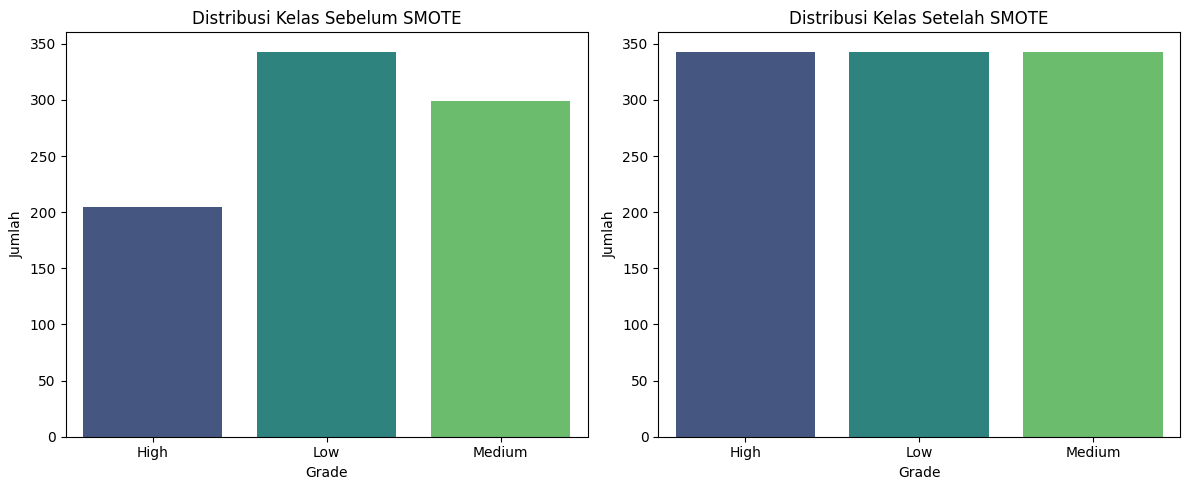

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='viridis')
plt.title("Distribusi Kelas Sebelum SMOTE")
plt.xlabel("Grade")
plt.ylabel("Jumlah")
plt.xticks([0, 1, 2], ['High', 'Low', 'Medium'])

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote, palette='viridis')
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xlabel("Grade")
plt.ylabel("Jumlah")
plt.xticks([0, 1, 2], ['High', 'Low', 'Medium'])

plt.tight_layout()
plt.savefig("distribusi_setelah_smote.png")
plt.show()


# **Tujuan**:
Untuk mencari **kombinasi parameter terbaik** pada model **Decision Tree** menggunakan **Grid Search** dengan **validasi silang** (cross-validation), agar performa model optimal.

 **Penjelasan Kode**:

- **Menentukan Ruang Pencarian Parameter**:
  - **`param_grid_dt`** mendefinisikan ruang pencarian untuk parameter:
    - **`max_depth`**: kedalaman maksimum pohon.
    - **`min_samples_split`**: jumlah minimal sampel untuk membagi node.
    - **`min_samples_leaf`**: jumlah minimal sampel di daun pohon.

- **Inisialisasi Grid Search**:
  - **`grid_dt = GridSearchCV(...)`** menggunakan **`DecisionTreeClassifier`** dengan:
    - **5-fold cross-validation** (**cv=5**).
    - Skor evaluasi menggunakan **F1-score berbobot** (**scoring='f1_weighted'**) untuk menangani ketidakseimbangan kelas.
    - **`error_score='raise'`** akan menampilkan error jika ada masalah saat pencarian.

- **Melatih Grid Search**:
  - **`grid_dt.fit(X_train_smote, y_train_smote)`** melatih **semua kombinasi model** terhadap data training hasil **SMOTE**.

- **Menampilkan Hasil Terbaik**:
  - **`grid_dt.best_params_`** menampilkan parameter terbaik.
  - **`grid_dt.best_score_`** menampilkan skor **F1-Score** terbaik dari validasi silang.

- **Membangun Model Terbaik**:
  - **`dt_model_best = grid_dt.best_estimator_`** mengambil model terbaik dari grid search.
  - **`dt_model_best.fit(X_train_smote, y_train_smote)`** melatih ulang model terbaik dengan parameter optimal di seluruh data training.


In [ ]:
param_grid_dt = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1_weighted', error_score='raise')
grid_dt.fit(X_train_smote, y_train_smote)

print(f"Parameter terbaik Decision Tree: {grid_dt.best_params_}")
print(f"F1-Score CV terbaik: {grid_dt.best_score_:.4f}")

dt_model_best = grid_dt.best_estimator_
dt_model_best.fit(X_train_smote, y_train_smote)

Parameter terbaik Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
F1-Score CV terbaik: 0.9825


DecisionTreeClassifier(max_depth=10, random_state=42)

# **Tujuan:**
Mengukur **performa Decision Tree terbaik** (hasil Grid Search) saat memprediksi data training hasil oversampling **SMOTE**.

**Penjelasan Kode:**

- **Melakukan Prediksi terhadap Data Training**:
  - **`dt_train_pred = dt_model_best.predict(X_train_smote)`** memprediksi label dari data training.

- **Menghitung Metrik Evaluasi**:
  - **`dt_accuracy = accuracy_score(y_train_smote, dt_train_pred)`** mengukur **Akurasi**: proporsi prediksi yang benar.
  - **`dt_precision = precision_score(y_train_smote, dt_train_pred, average='weighted')`** mengukur **Presisi**: seberapa akurat model saat memprediksi suatu kelas (rata-rata berbobot).
  - **`dt_recall = recall_score(y_train_smote, dt_train_pred, average='weighted')`** mengukur **Recall**: seberapa baik model menemukan semua label yang relevan.
  - **`dt_f1 = f1_score(y_train_smote, dt_train_pred, average='weighted')`** mengukur **F1-Score**: harmonic mean dari presisi dan recall.

- **Menampilkan Hasil Evaluasi**:
  - **`print()`** digunakan untuk mencetak hasil metrik evaluasi:
    - **Akurasi**
    - **Presisi**
    - **Recall**
    - **F1-Score**
  
Metrik ini digunakan untuk menilai performa model pada data training dan membandingkannya dengan hasil di data testing.


In [ ]:
dt_train_pred = dt_model_best.predict(X_train_smote)

dt_accuracy = accuracy_score(y_train_smote, dt_train_pred)
dt_precision = precision_score(y_train_smote, dt_train_pred, average='weighted')
dt_recall = recall_score(y_train_smote, dt_train_pred, average='weighted')
dt_f1 = f1_score(y_train_smote, dt_train_pred, average='weighted')

print("\n--- Metrik Evaluasi Decision Tree pada Data Training ---")
print(f"Akurasi: {dt_accuracy:.4f}")
print(f"Presisi: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")


--- Metrik Evaluasi Decision Tree pada Data Training ---
Akurasi: 0.9874
Presisi: 0.9876
Recall: 0.9874
F1-Score: 0.9874


# **Prediksi pada Data Testing**

- **Melakukan Prediksi**:
  - **`dt_test_pred = dt_model_best.predict(X_test_selected)`** menggunakan model yang telah ditraining untuk memprediksi label dari data uji.

- **Menghitung Metrik Evaluasi**:
  - **`dt_test_accuracy = accuracy_score(y_test, dt_test_pred)`** mengukur **Akurasi**: rasio prediksi benar dari total prediksi.
  - **`dt_test_precision = precision_score(y_test, dt_test_pred, average='weighted')`** mengukur **Presisi (Weighted)**: rata-rata presisi dari semua kelas, mempertimbangkan jumlah sampel tiap kelas.
  - **`dt_test_recall = recall_score(y_test, dt_test_pred, average='weighted')`** mengukur **Recall (Weighted)**: rata-rata recall dari semua kelas, mempertimbangkan jumlah sampel tiap kelas.
  - **`dt_test_f1 = f1_score(y_test, dt_test_pred, average='weighted')`** mengukur **F1-Score (Weighted)**: harmonic mean antara presisi dan recall.

- **Menampilkan Hasil Evaluasi**:
  - **`print(f"Akurasi: {dt_test_accuracy:.4f}")`** mencetak nilai akurasi.
  - **`print(f"Presisi: {dt_test_precision:.4f}")`** mencetak nilai presisi.
  - **`print(f"Recall: {dt_test_recall:.4f}")`** mencetak nilai recall.
  - **`print(f"F1-Score: {dt_test_f1:.4f}")`** mencetak nilai F1-score.

- **Laporan Klasifikasi Detail**:
  - **`print(classification_report(y_test, dt_test_pred, target_names=['High', 'Low', 'Medium']))`** menampilkan laporan evaluasi lengkap untuk masing-masing kelas, termasuk presisi, recall, F1-score per kelas, dan support (jumlah sampel per kelas).


In [ ]:
dt_test_pred = dt_model_best.predict(X_test_selected)

dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
dt_test_precision = precision_score(y_test, dt_test_pred, average='weighted')
dt_test_recall = recall_score(y_test, dt_test_pred, average='weighted')
dt_test_f1 = f1_score(y_test, dt_test_pred, average='weighted')

print("\n--- Metrik Evaluasi Decision Tree pada Data Testing ---")
print(f"Akurasi: {dt_test_accuracy:.4f}")
print(f"Presisi: {dt_test_precision:.4f}")
print(f"Recall: {dt_test_recall:.4f}")
print(f"F1-Score: {dt_test_f1:.4f}")

print("\nLaporan Klasifikasi Decision Tree:")
print(classification_report(y_test, dt_test_pred, target_names=['High', 'Low', 'Medium']))


--- Metrik Evaluasi Decision Tree pada Data Testing ---
Akurasi: 0.9906
Presisi: 0.9906
Recall: 0.9906
F1-Score: 0.9906

Laporan Klasifikasi Decision Tree:
              precision    recall  f1-score   support

        High       0.98      0.98      0.98        51
         Low       1.00      1.00      1.00        86
      Medium       0.99      0.99      0.99        75

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212





- **Ambil Label Unik**:
  - **`labels = sorted(list(set(y_true)))`** mengambil label unik dari **data y_true** dan mengurutkannya.

- **Buat Confusion Matrix**:
  - **`cm = confusion_matrix(y_true, y_pred, labels=labels)`** menghitung **matriks konfusi** berdasarkan label unik.

- **Tentukan Label Sumbu**:
  - **`x_labels = class_names if class_names else labels`** dan **`y_labels = class_names if class_names else labels`** menentukan label sumbu-x dan sumbu-y, menggunakan **`class_names`** jika tersedia, jika tidak menggunakan label yang diambil.

- **Visualisasi dengan Seaborn Heatmap**:
  - **`sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=x_labels, yticklabels=y_labels)`** menampilkan matriks konfusi sebagai **peta panas** dengan opsi:
    - **`annot=True`**: menampilkan nilai numerik.
    - **`fmt='d'`**: menampilkan angka dalam format bilangan bulat.
    - **`cmap='Blues'`**: menggunakan skema warna biru.

- **Tambahkan Label dan Judul Grafik**:
  - **`plt.xlabel("Label Prediksi")`** memberi label pada sumbu-x.
  - **`plt.ylabel("Label Sebenarnya")`** memberi label pada sumbu-y.
  - **`plt.title(f"Matriks Konfusi - {title}")`** menambahkan judul grafik.

- **Tampilkan Hasil**:
  - **`plt.tight_layout()`** mengatur tata letak agar rapi.
  - **`plt.show()`** menampilkan grafik secara interaktif.


In [ ]:
def plot_matriks_konfusi(y_true, y_pred, title="Model"):
    labels = sorted(list(set(y_true)))
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=labels, yticklabels=labels)

    plt.xlabel("Label Prediksi")
    plt.ylabel("Label Sebenarnya")
    plt.title(f"Matriks Konfusi - {title}")
    plt.tight_layout()
    plt.show()

Fungsi ini digunakan untuk **memvisualisasikan matriks konfusi** dari hasil prediksi model klasifikasi. **Matriks konfusi** adalah tabel yang menunjukkan performa model dalam mengklasifikasikan data, dengan membandingkan **label sebenarnya** (ground truth) dan **label hasil prediksi**.

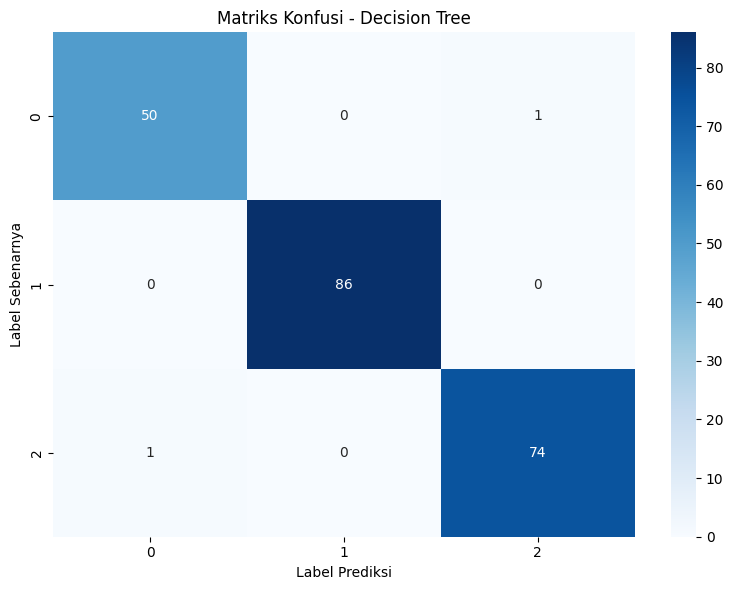

In [ ]:
plot_matriks_konfusi(y_test, dt_test_pred, "Decision Tree")



Kode ini melakukan **pencarian hyperparameter terbaik** untuk model **K-Nearest Neighbors (KNN)** menggunakan **GridSearchCV** dari scikit-learn. Tujuannya adalah menemukan kombinasi parameter yang menghasilkan performa terbaik berdasarkan **metrik F1-score weighted** melalui proses **cross-validation**.

### **Penjelasan Detail Tiap Bagian**:

- **`param_grid_knn`**: Dictionary yang berisi kombinasi nilai parameter yang akan diuji, terdiri dari:
  - **`n_neighbors`**: jumlah tetangga terdekat yang diperhitungkan oleh KNN (3, 5, 7, 11, 15, 21).
  - **`weights`**: metode pemberian bobot ke tetangga, bisa **uniform** (bobot sama) atau **distance** (bobot berdasarkan jarak).
  - **`algorithm`**: algoritma pencarian tetangga terdekat (**auto**, **ball_tree**, **kd_tree**).
  - **`p`**: parameter untuk fungsi jarak Minkowski (**p=1** untuk jarak Manhattan, **p=2** untuk jarak Euclidean).

- **`GridSearchCV`**: Membuat objek pencarian grid dengan:
  - **Estimator**: **`KNeighborsClassifier()`**.
  - **Parameter grid**: **`param_grid_knn`**.
  - **Cross-validation**: 5-fold (**cv=5**).
  - **Scoring**: menggunakan metrik **f1_weighted**, untuk memperhatikan keseimbangan kelas.

- **Fitting GridSearchCV**:
  - **`grid_knn.fit(X_train_smote, y_train_smote)`** melakukan pencarian dengan mencoba semua kombinasi parameter pada data training yang sudah diseimbangkan dengan **SMOTE**.

- **Menampilkan Hasil Terbaik**:
  - **`grid_knn.best_params_`** menampilkan **kombinasi parameter terbaik** berdasarkan F1-score CV.
  - **`grid_knn.best_score_`** menampilkan **nilai F1-score tertinggi** dari cross-validation.

- **Membangun Model Final**:
  - **`knn_model = grid_knn.best_estimator_`** mengambil model KNN dengan parameter terbaik.
  - **`knn_model.fit(X_train_smote, y_train_smote)`** melatih model terbaik ini pada data training **SMOTE**.


In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 11, 15, 21],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1, 2]
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1_weighted')
grid_knn.fit(X_train_smote, y_train_smote)

print(f"Parameter terbaik KNN: {grid_knn.best_params_}")
print(f"F1-Score CV terbaik: {grid_knn.best_score_:.4f}")

knn_model = grid_knn.best_estimator_
knn_model.fit(X_train_smote, y_train_smote)

Parameter terbaik KNN: {'algorithm': 'auto', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
F1-Score CV terbaik: 0.9825


KNeighborsClassifier(n_neighbors=15, p=1, weights='distance')



Kode ini digunakan untuk **mengukur performa** model **K-Nearest Neighbors (KNN)** setelah dilatih pada **data training** yang sudah diseimbangkan menggunakan **SMOTE**.

### **Penjelasan Detail Tiap Bagian**:

- **`knn_train_pred = knn_model.predict(X_train_smote)`**:
  - Model **KNN** yang sudah dilatih digunakan untuk memprediksi **label** pada data training SMOTE (**X_train_smote**).

- **`print("\n--- Metrik Evaluasi KNN pada Data Training ---")`**:
  - Menampilkan header untuk membedakan hasil evaluasi pada **data training**.

- **`accuracy_score(y_train_smote, knn_train_pred)`**:
  - Menghitung **akurasinya**, yaitu proporsi prediksi yang benar dari seluruh data training.

- **`precision_score(y_train_smote, knn_train_pred, average='weighted')`**:
  - Menghitung **presisi weighted**, mempertimbangkan proporsi prediksi positif yang benar, dengan bobot sesuai jumlah sampel tiap kelas.

- **`recall_score(y_train_smote, knn_train_pred, average='weighted')`**:
  - Menghitung **recall weighted**, yang mengukur kemampuan model dalam menemukan semua sampel positif, dengan bobot sesuai distribusi kelas.

- **`f1_score(y_train_smote, knn_train_pred, average='weighted')`**:
  - Menghitung **F1-Score weighted**, rata-rata harmonis dari presisi dan recall dengan bobot sesuai kelas, yang penting untuk dataset yang tidak seimbang.


In [ ]:
knn_train_pred = knn_model.predict(X_train_smote)
print("\n--- Metrik Evaluasi KNN pada Data Training ---")
print(f"Akurasi: {accuracy_score(y_train_smote, knn_train_pred):.4f}")
print(f"Presisi: {precision_score(y_train_smote, knn_train_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train_smote, knn_train_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_train_smote, knn_train_pred, average='weighted'):.4f}")


--- Metrik Evaluasi KNN pada Data Training ---
Akurasi: 0.9874
Presisi: 0.9876
Recall: 0.9874
F1-Score: 0.9874




Kode ini berfungsi untuk **mengukur performa** model **K-Nearest Neighbors (KNN)** pada **data testing** yang sudah disiapkan (**X_test_selected**), dengan membandingkan **prediksi model** terhadap **label asli** (**y_test**).

### **Penjelasan Detail Tiap Bagian**:

- **`knn_test_pred = knn_model.predict(X_test_selected)`**:
  - Model **KNN** yang sudah dilatih digunakan untuk **memprediksi label** pada data testing.

- **`print("\n--- Metrik Evaluasi KNN pada Data Testing ---")`**:
  - Menampilkan header sebagai tanda awal output **metrik evaluasi** untuk data testing.

- **`accuracy_score(y_test, knn_test_pred)`**:
  - Menghitung **akurasinya**, yaitu persentase prediksi yang benar dibandingkan dengan total sampel testing.

- **`precision_score(y_test, knn_test_pred, average='weighted')`**:
  - Menghitung **presisi weighted**, yang memperhitungkan ketepatan prediksi positif dengan bobot berdasarkan jumlah sampel tiap kelas.

- **`recall_score(y_test, knn_test_pred, average='weighted')`**:
  - Menghitung **recall weighted**, kemampuan model dalam menangkap seluruh sampel positif dari tiap kelas dengan bobot distribusi kelas.

- **`f1_score(y_test, knn_test_pred, average='weighted')`**:
  - Menghitung **F1-Score weighted**, metrik harmonis antara presisi dan recall, berguna untuk menilai keseimbangan antara keduanya di dataset yang mungkin tidak seimbang.

- **`print(classification_report(y_test, knn_test_pred, target_names=['High', 'Low', 'Medium']))`**:
  - Menampilkan **laporan klasifikasi** lengkap yang memuat **precision**, **recall**, **f1-score**, dan **support** per kelas (**'High'**, **'Low'**, **'Medium'**), memudahkan analisis performa model per kelas.


In [ ]:
knn_test_pred = knn_model.predict(X_test_selected)
print("\n--- Metrik Evaluasi KNN pada Data Testing ---")
knn_accuracy = accuracy_score(y_test, knn_test_pred)
knn_precision = precision_score(y_test, knn_test_pred, average='weighted')
knn_recall = recall_score(y_test, knn_test_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_test_pred, average='weighted')

print(f"Akurasi: {knn_accuracy:.4f}")
print(f"Presisi: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-Score: {knn_f1:.4f}")

print("\nLaporan Klasifikasi KNN:")
print(classification_report(y_test, knn_test_pred, target_names=['High', 'Low', 'Medium']))


--- Metrik Evaluasi KNN pada Data Testing ---
Akurasi: 0.9906
Presisi: 0.9906
Recall: 0.9906
F1-Score: 0.9906

Laporan Klasifikasi KNN:
              precision    recall  f1-score   support

        High       0.98      0.98      0.98        51
         Low       1.00      1.00      1.00        86
      Medium       0.99      0.99      0.99        75

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



Kode **`plot_matriks_konfusi(y_test, knn_test_pred, "K-Nearest Neighbors")`** ini berfungsi untuk menampilkan **matriks konfusi** hasil prediksi model **K-Nearest Neighbors (KNN)** pada **data testing**.

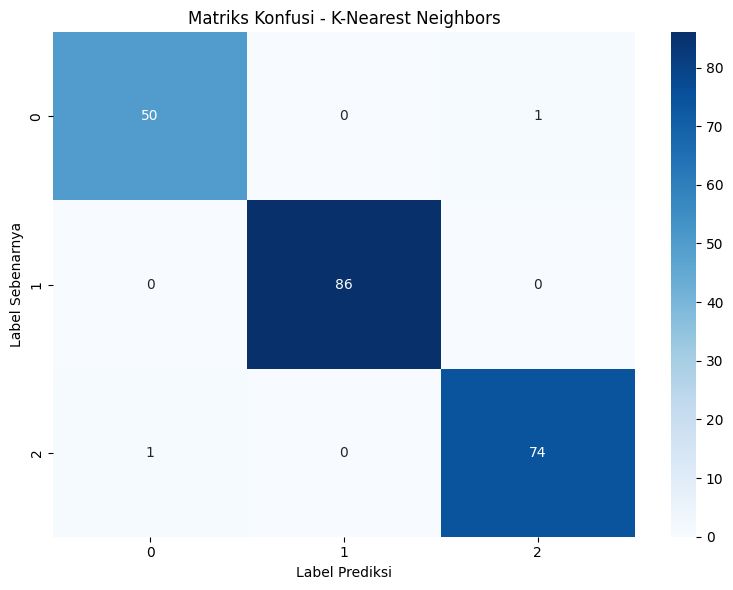

In [ ]:
plot_matriks_konfusi(y_test, knn_test_pred, "K-Nearest Neighbors")

Kode ini bertujuan untuk melakukan **hyperparameter tuning** pada model **Gaussian Naive Bayes** dengan menggunakan metode **GridSearchCV** untuk mencari nilai parameter **var_smoothing** terbaik yang menghasilkan performa model optimal berdasarkan **skor F1-weighted** melalui **validasi silang 5-fold**.

### **Penjelasan Setiap Bagian**:

- **`param_grid_nb`**:
  - Berisi daftar nilai **var_smoothing** yang akan dicoba, mulai dari sangat kecil (**1e-12**) sampai sedikit lebih besar (**1e-6**).
  - **var_smoothing** digunakan untuk menambahkan nilai kecil ke **variansi fitur** untuk menghindari pembagian nol dan meningkatkan stabilitas model.

- **`GridSearchCV`**:
  - Membuat objek **GridSearch** dengan:
    - **Estimator**: **Gaussian Naive Bayes** (**`GaussianNB()`**).
    - **Parameter grid**: yang sudah didefinisikan.
    - **`cv=5`** artinya **validasi silang 5 lipatan**.
    - **`scoring='f1_weighted'`** berarti evaluasi berdasarkan **F1-score** dengan bobot sesuai proporsi kelas.

- **Fitting GridSearchCV ke Data Training SMOTE**:
  - **`grid_nb.fit(X_train_smote, y_train_smote)`** melatih dan mengevaluasi model dengan kombinasi parameter yang berbeda untuk menemukan yang terbaik.

- **Menampilkan Hasil Terbaik**:
  - **`grid_nb.best_params_`** menampilkan nilai **var_smoothing** terbaik yang ditemukan.
  - **`grid_nb.best_score_`** menampilkan **skor F1 tertinggi** pada validasi silang.

- **Melatih Ulang Model dengan Parameter Terbaik**:
  - **`nb_model = grid_nb.best_estimator_`** mengambil model terbaik.
  - **`nb_model.fit(X_train_smote, y_train_smote)`** melatih ulang model tersebut pada seluruh data training yang sudah di-resample menggunakan **SMOTE**.


In [ ]:
param_grid_nb = {
    'var_smoothing': [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6]
}

grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='f1_weighted')
grid_nb.fit(X_train_smote, y_train_smote)

print(f"Parameter terbaik Naive Bayes: {grid_nb.best_params_}")
print(f"F1-Score CV terbaik: {grid_nb.best_score_:.4f}")

nb_model = grid_nb.best_estimator_
nb_model.fit(X_train_smote, y_train_smote)

Parameter terbaik Naive Bayes: {'var_smoothing': 1e-12}
F1-Score CV terbaik: 0.8346


GaussianNB(var_smoothing=1e-12)

Kode ini digunakan untuk **mengevaluasi performa model Naive Bayes** yang sudah dilatih pada **data training** yang telah di-resample menggunakan **SMOTE**. Berikut penjelasan rinci setiap bagiannya:

### **Penjelasan Kode**:

- **Prediksi pada Data Training**:
  - **`nb_train_pred = nb_model.predict(X_train_smote)`**: Model **Naive Bayes** yang sudah dilatih (**`nb_model`**) digunakan untuk memprediksi **label kelas** pada data training (**X_train_smote**).

- **Menampilkan Metrik Evaluasi**:
  Kode berikut menghitung dan menampilkan metrik performa utama model pada data training:
  
  - **`accuracy_score(y_train_smote, nb_train_pred)`**: Menghitung **akurasi**, yaitu proporsi prediksi yang benar dari seluruh data.
  
  - **`precision_score(y_train_smote, nb_train_pred, average='weighted')`**: Menghitung **presisi rata-rata tertimbang**, yaitu kemampuan model dalam memprediksi kelas positif secara tepat, dengan bobot sesuai proporsi tiap kelas.
  
  - **`recall_score(y_train_smote, nb_train_pred, average='weighted')`**: Menghitung **recall rata-rata tertimbang**, yaitu kemampuan model untuk menangkap semua sampel positif dari tiap kelas.
  
  - **`f1_score(y_train_smote, nb_train_pred, average='weighted')`**: Menghitung **skor F1 rata-rata tertimbang**, yaitu harmonisasi antara **presisi** dan **recall** sebagai ukuran keseimbangan performa.

- **Format Output**:
  - Metrik-metrik tersebut ditampilkan dengan **format 4 angka di belakang koma** agar mudah dibaca dan rapi.


In [ ]:
nb_train_pred = nb_model.predict(X_train_smote)
print("\n--- Metrik Evaluasi Naive Bayes pada Data Training ---")
print(f"Akurasi: {accuracy_score(y_train_smote, nb_train_pred):.4f}")
print(f"Presisi: {precision_score(y_train_smote, nb_train_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train_smote, nb_train_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_train_smote, nb_train_pred, average='weighted'):.4f}")


--- Metrik Evaluasi Naive Bayes pada Data Training ---
Akurasi: 0.8377
Presisi: 0.8818
Recall: 0.8377
F1-Score: 0.8348


# **Prediksi pada Data Testing**

- **Prediksi pada Data Testing**:
  - **`nb_test_pred = nb_model.predict(X_test_selected)`**: Model **Naive Bayes** (**`nb_model`**) digunakan untuk memprediksi **kelas label** pada data testing (**X_test_selected**).

- **Menghitung Metrik Evaluasi**:
  Beberapa metrik utama dihitung untuk menilai performa model pada data testing:
  
  - **Akurasi (accuracy)**: Proporsi prediksi yang benar dari seluruh sampel testing.
    - **`accuracy_score(y_test, nb_test_pred)`**
  
  - **Presisi (precision)**: Kemampuan model menghasilkan prediksi positif yang benar, dihitung rata-rata tertimbang untuk tiap kelas.
    - **`precision_score(y_test, nb_test_pred, average='weighted')`**
  
  - **Recall**: Kemampuan model menangkap semua sampel positif pada tiap kelas, dihitung rata-rata tertimbang.
    - **`recall_score(y_test, nb_test_pred, average='weighted')`**
  
  - **F1-Score**: Harmoni antara presisi dan recall, sebagai ukuran keseimbangan performa model secara keseluruhan.
    - **`f1_score(y_test, nb_test_pred, average='weighted')`**

- **Menampilkan Hasil Metrik**:
  - Nilai metrik tersebut ditampilkan dengan **format 4 desimal** agar lebih rapi dan mudah dibaca.

- **Laporan Klasifikasi Lengkap**:
  - **`classification_report(y_test, nb_test_pred, target_names=['High', 'Low', 'Medium'])`** menampilkan laporan lengkap yang mencakup **precision**, **recall**, **f1-score**, dan **support** untuk setiap kelas (**'High'**, **'Low'**, dan **'Medium'**).


In [ ]:
nb_test_pred = nb_model.predict(X_test_selected)
print("\n--- Metrik Evaluasi Naive Bayes pada Data Testing ---")
nb_accuracy = accuracy_score(y_test, nb_test_pred)
nb_precision = precision_score(y_test, nb_test_pred, average='weighted')
nb_recall = recall_score(y_test, nb_test_pred, average='weighted')
nb_f1 = f1_score(y_test, nb_test_pred, average='weighted')

print(f"Akurasi: {nb_accuracy:.4f}")
print(f"Presisi: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1-Score: {nb_f1:.4f}")

print("\nLaporan Klasifikasi Naive Bayes:")
print(classification_report(y_test, nb_test_pred, target_names=['High', 'Low', 'Medium']))


--- Metrik Evaluasi Naive Bayes pada Data Testing ---
Akurasi: 0.8538
Presisi: 0.8940
Recall: 0.8538
F1-Score: 0.8572

Laporan Klasifikasi Naive Bayes:
              precision    recall  f1-score   support

        High       0.64      0.98      0.78        51
         Low       1.00      0.93      0.96        86
      Medium       0.94      0.68      0.79        75

    accuracy                           0.85       212
   macro avg       0.86      0.86      0.84       212
weighted avg       0.89      0.85      0.86       212



Kode ini digunakan untuk menampilkan **matriks konfusi** dari hasil prediksi model **Naive Bayes** pada **data testing**, dengan tujuan:

- **Visualisasi performa model** secara detail pada tiap kelas.
- Menunjukkan **berapa banyak sampel** yang diklasifikasikan dengan benar (nilai diagonal) dan berapa banyak yang salah klasifikasi (nilai di luar diagonal).
- Membantu mengidentifikasi kelas mana yang paling sering **salah diprediksi**.

Fungsi **`plot_matriks_konfusi`** yang dipanggil dengan argumen **`y_test`** (label asli), **`nb_test_pred`** (prediksi model Naive Bayes), dan judul **"Naive Bayes"** akan menampilkan **heatmap matriks konfusi** yang mudah dipahami secara visual.


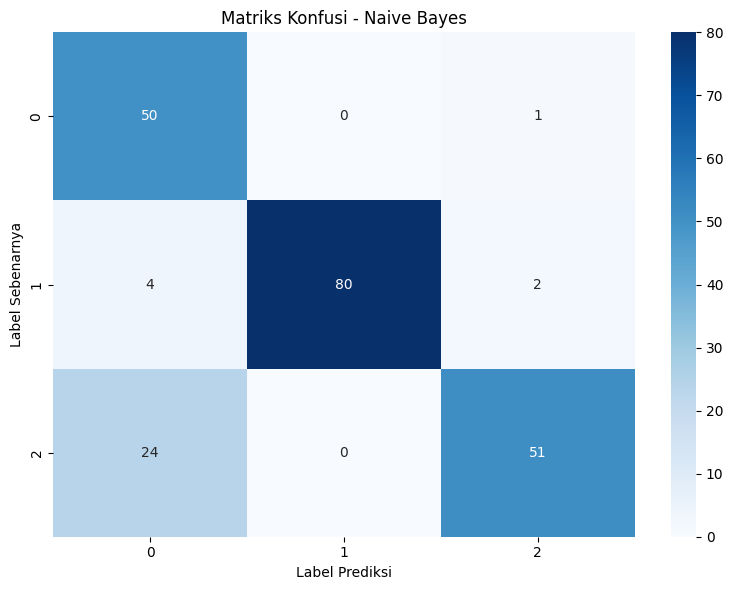

In [ ]:
plot_matriks_konfusi(y_test, nb_test_pred, "Naive Bayes")

Kode ini berfungsi untuk **menggabungkan hasil evaluasi performa** tiga model klasifikasi (**Decision Tree**, **KNN**, dan **Naive Bayes**) ke dalam sebuah **DataFrame pandas** yang rapi dan mudah dibaca. Berikut penjelasan detailnya:

- **`dt_metrics`, `knn_metrics`, `nb_metrics`**:
  - Masing-masing list berisi **metrik evaluasi** model pada data testing:
    - **Accuracy** (Akurasi)
    - **Precision** (Presisi)
    - **Recall**
    - **F1-Score**

- **Membuat DataFrame `performance_df`**:
  - Kolom-kolomnya adalah nama model: **'Decision Tree'**, **'KNN'**, dan **'Naive Bayes'**.
  - Barisnya adalah **metrik evaluasi**: **'Akurasi'**, **'Presisi'**, **'Recall'**, dan **'F1-Score'**.
  - DataFrame ini menyimpan **nilai performa** masing-masing model sesuai metriknya.

- **`performance_df.head()`**:
  - Memanggil fungsi **`.head()`** untuk menampilkan **5 baris pertama** DataFrame (walaupun dalam kasus ini hanya 4 baris, sehingga menampilkan seluruh DataFrame).


In [ ]:
dt_metrics = [dt_test_accuracy, dt_test_precision, dt_test_recall, dt_test_f1]
knn_metrics = [knn_accuracy, knn_precision, knn_recall, knn_f1]
nb_metrics = [nb_accuracy, nb_precision, nb_recall, nb_f1]

performance_df = pd.DataFrame({
    'Decision Tree': dt_metrics,
    'KNN': knn_metrics,
    'Naive Bayes': nb_metrics,
}, index=['Akurasi', 'Presisi', 'Recall', 'F1-Score'])

performance_df.head()

,Decision Tree,KNN,Naive Bayes
Akurasi,0.990566,0.990566,0.853774
Presisi,0.990566,0.990566,0.893989
Recall,0.990566,0.990566,0.853774
F1-Score,0.990566,0.990566,0.857211


Kode ini digunakan untuk membuat **visualisasi perbandingan performa** ketiga model (**Decision Tree**, **KNN**, dan **Naive Bayes**) menggunakan **grafik batang** (bar chart). Berikut penjelasan rinci setiap bagian:

- **`plt.figure(figsize=(12, 8))`**:
  - Membuat figure baru dengan ukuran **12x8 inci**.

- **`performance_df.plot(kind='bar', figsize=(12, 8), rot=0)`**:
  - Membuat **plot batang** dari DataFrame **`performance_df`**, dengan ukuran figure yang sama dan rotasi label sumbu x **0 derajat** (horizontal).

- **`plt.title('Perbandingan Performa Model', fontsize=16)`**:
  - Menambahkan **judul grafik** dengan ukuran font **16**.

- **`plt.ylabel('Skor', fontsize=14)`**:
  - Memberi **label pada sumbu y**, yaitu **"Skor"** (nilai metrik), dengan **font size 14**.

- **`plt.xlabel('Metrik', fontsize=14)`**:
  - Memberi **label pada sumbu x**, yaitu **"Metrik"** (Akurasi, Presisi, Recall, F1-Score).

- **`plt.legend(title='Model', fontsize=12)`**:
  - Menampilkan **legenda** dengan judul **"Model"** dan ukuran font **12**.

- **`plt.grid(axis='y', linestyle='--', alpha=0.7)`**:
  - Menambahkan **grid** garis putus-putus pada sumbu **y** untuk memudahkan pembacaan nilai, dengan transparansi **0.7**.

- **`plt.tight_layout()`**:
  - Mengatur **layout** agar elemen-elemen grafik tidak saling tumpang tindih.

- **`plt.savefig('perbandingan_performa_model.png')`**:
  - Menyimpan grafik sebagai file gambar PNG dengan nama **'perbandingan_performa_model.png'**.

- **`plt.show()`**:
  - Menampilkan grafik di layar.


<Figure size 1200x800 with 0 Axes>

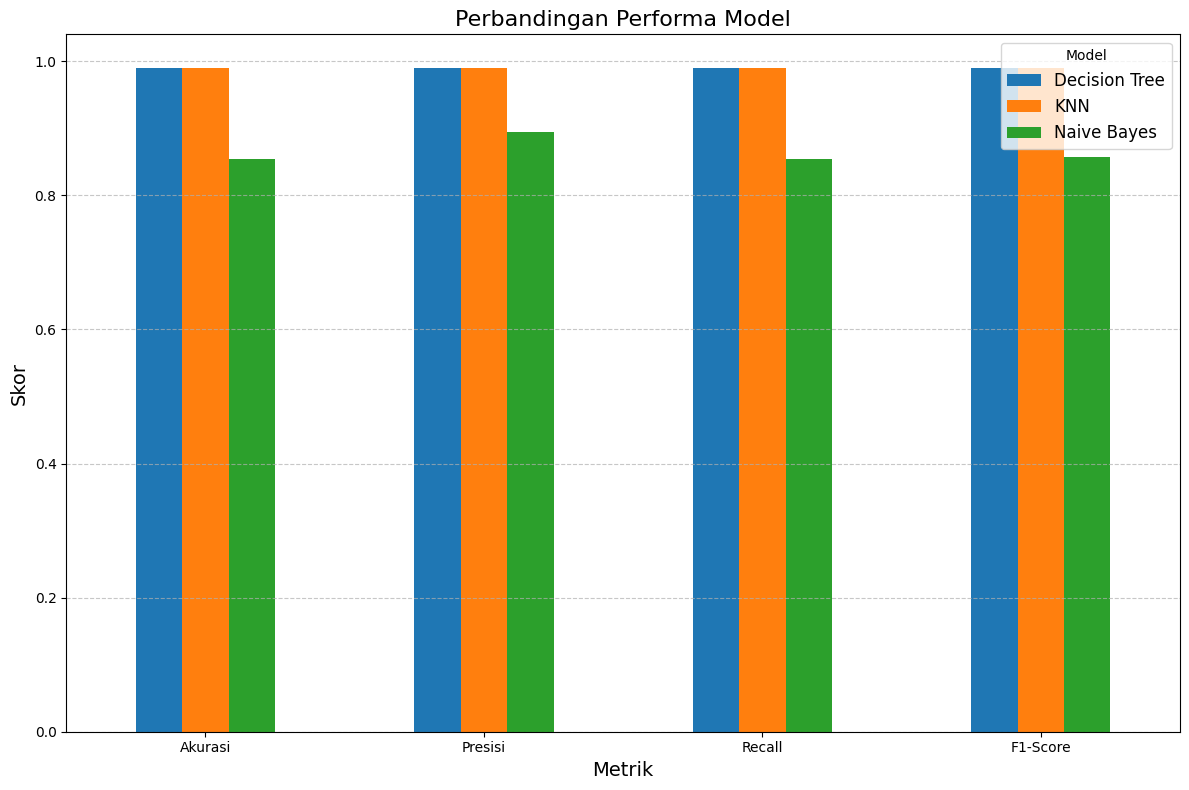

In [ ]:
plt.figure(figsize=(12, 8))
performance_df.plot(kind='bar', figsize=(12, 8), rot=0)
plt.title('Perbandingan Performa Model', fontsize=16)
plt.ylabel('Skor', fontsize=14)
plt.xlabel('Metrik', fontsize=14)
plt.legend(title='Model', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('perbandingan_performa_model.png')
plt.show()

Kode ini berfungsi untuk **membandingkan hasil prediksi** antara model **Decision Tree (DT)** dan **K-Nearest Neighbors (KNN)** pada **data testing** secara detail. Berikut penjelasan setiap bagiannya:

- **`print(f"DT akurasi exact: {dt_test_accuracy}")`**:
  - Menampilkan nilai **akurasi Decision Tree** pada data testing (dalam format **float** persis).

- **`print(f"KNN akurasi exact: {knn_accuracy}")`**:
  - Menampilkan nilai **akurasi KNN** pada data testing.

- **`print(f"Selisih: {abs(dt_test_accuracy - knn_accuracy)}")`**:
  - Menghitung dan menampilkan **selisih mutlak** antara akurasi **Decision Tree** dan **KNN**.

- **`dt_correct = (dt_test_pred == y_test).sum()`**:
  - Menghitung jumlah **prediksi benar** yang dibuat **Decision Tree** pada data testing (membandingkan prediksi dengan label sebenarnya).

- **`knn_correct = (knn_test_pred == y_test).sum()`**:
  - Menghitung jumlah **prediksi benar** yang dibuat **KNN**.

- **`print(f"DT prediksi benar: {dt_correct}/{len(y_test)}")`**:
  - Menampilkan berapa banyak **prediksi Decision Tree** yang benar dibandingkan total data testing.

- **`print(f"KNN prediksi benar: {knn_correct}/{len(y_test)}")`**:
  - Menampilkan jumlah **prediksi benar KNN**.

- **`print(f"Prediksi identik: {np.array_equal(dt_test_pred, knn_test_pred)}")`**:
  - Mengecek dan menampilkan apakah **prediksi Decision Tree** dan **KNN identik** (sama persis untuk semua data testing). Hasilnya **True** jika semua sama, **False** jika ada perbedaan.


In [ ]:
print(f"DT akurasi exact: {dt_test_accuracy}")
print(f"KNN akurasi exact: {knn_accuracy}")
print(f"Selisih: {abs(dt_test_accuracy - knn_accuracy)}")

dt_correct = (dt_test_pred == y_test).sum()
knn_correct = (knn_test_pred == y_test).sum()
print(f"DT prediksi benar: {dt_correct}/{len(y_test)}")
print(f"KNN prediksi benar: {knn_correct}/{len(y_test)}")

print(f"Prediksi identik: {np.array_equal(dt_test_pred, knn_test_pred)}")

DT akurasi exact: 0.9905660377358491
KNN akurasi exact: 0.9905660377358491
Selisih: 0.0
DT prediksi benar: 210/212
KNN prediksi benar: 210/212
Prediksi identik: True
